# Very quick EDA of simulated data
While we can look at how this data is generated to understand it better. Good to do an EDA to simulate how a usual data science project would work. Saying that, hardly any time will be spent on this EDA compared to a normal project.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.1f}".format

## Load data

In [2]:
from data.load_sim_data import load_all_sim_data

In [3]:
transactions_df, customers_df, terminals_df = load_all_sim_data()

## Transactions

In [4]:
transactions_df.shape

(1754155, 10)

In [32]:
transactions_df.head(4)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,2018-04-01
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,2018-04-01
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,2018-04-01
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,2018-04-01


In [31]:
transactions_df.dtypes

TRANSACTION_ID                int64
TX_DATETIME          datetime64[ns]
CUSTOMER_ID                   int64
TERMINAL_ID                   int64
TX_AMOUNT                   float64
TX_TIME_SECONDS               int64
TX_TIME_DAYS                  int64
TX_FRAUD                      int64
TX_FRAUD_SCENARIO             int64
TX_DATE              datetime64[ns]
dtype: object

In [49]:
# See date range
transactions_df['TX_DATETIME'].describe(datetime_is_numeric=True)

count                          1754155
mean     2018-07-01 11:20:33.708572160
min                2018-04-01 00:00:31
25%         2018-05-16 14:40:46.500000
50%                2018-07-01 11:11:10
75%         2018-08-16 08:01:01.500000
max                2018-09-30 23:59:57
Name: TX_DATETIME, dtype: object

array([[<AxesSubplot: title={'center': 'TX_AMOUNT'}>]], dtype=object)

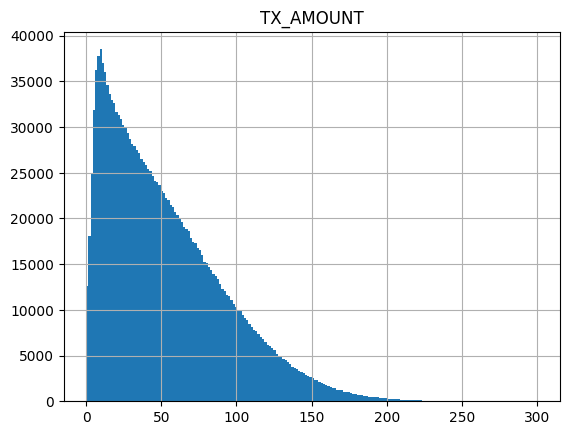

In [33]:
# See transaction distribution
transactions_df[transactions_df['TX_AMOUNT'] < 300].hist('TX_AMOUNT', bins=200)

In [46]:
# See how prevelent fraud is
print(transactions_df['TX_FRAUD'].mean())
print(transactions_df['TX_FRAUD'].sum())
print(len(transactions_df['TX_FRAUD']))
# Very rare

0.008369271814634397
14681
1754155


In [51]:
# See customer
transactions_df['CUSTOMER_ID'].astype('category').describe()

count     1754155
unique       4990
top           382
freq          767
Name: CUSTOMER_ID, dtype: int64

In [52]:
# See terminal
transactions_df['TERMINAL_ID'].astype('category').describe()

count     1754155
unique      10000
top          4018
freq          376
Name: TERMINAL_ID, dtype: int64

### Customers

In [5]:
customers_df.shape

(5000, 8)

In [6]:
customers_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.9,71.5,62.3,31.1,2.2,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",78
1,1,42.4,64.6,46.6,23.3,3.6,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",85
2,2,96.4,38.3,80.2,40.1,2.1,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",70
3,3,56.8,92.6,11.7,5.9,0.3,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",70
4,4,2.0,83.3,78.9,39.5,3.5,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939, ...",65


<AxesSubplot: >

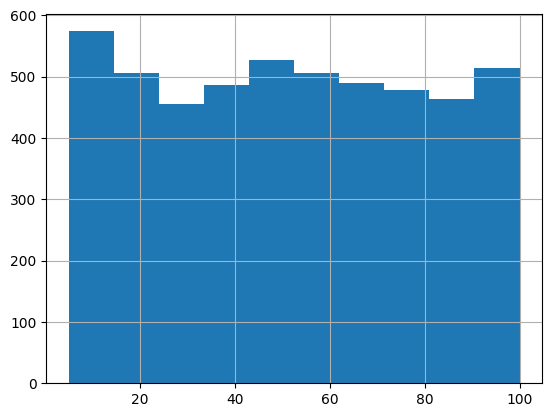

In [8]:
customers_df['mean_amount'].hist()
# pretty uniform

In [10]:
customers_df[['mean_amount', 'mean_nb_tx_per_day', 'nb_terminals']].describe()

,mean_amount,mean_nb_tx_per_day,nb_terminals
count,5000.0,5000.0,5000.0
mean,51.8,2.0,75.2
std,27.8,1.2,12.4
min,5.0,0.0,22.0
25%,27.9,1.0,69.0
50%,51.7,2.0,77.0
75%,75.6,3.0,83.0
max,100.0,4.0,106.0


## Terminals

In [11]:
terminals_df.shape

(10000, 3)

In [12]:
terminals_df.head()
# just terminal pos

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.7,72.0
1,1,0.0,30.2
2,2,14.7,9.2
3,3,18.6,34.6
4,4,39.7,53.9


<AxesSubplot: xlabel='x_terminal_id', ylabel='y_terminal_id'>

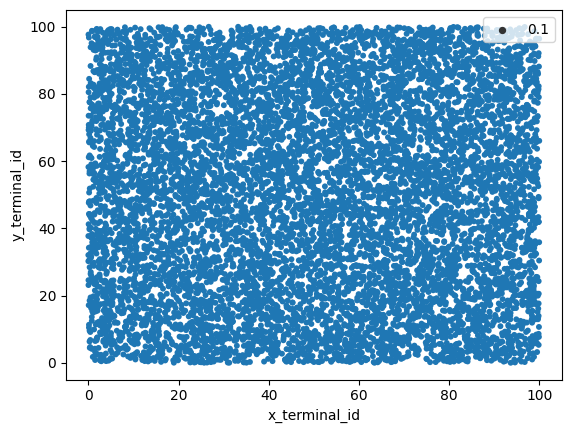

In [22]:
fig = sns.scatterplot(x="x_terminal_id", y="y_terminal_id",
                linewidth=0, size=0.1,
                data=terminals_df)
fig
# Looks to be uniformly distributed